## Project Overview

This exploratory analysis examines car sales data to uncover critical market trends, customer purchasing behaviors, and dealer performance metrics. Using *RStudio* for comprehensive statistical analysis and data visualization, this project leverages R programming alongside robust analytical libraries to transform raw transactional data into actionable business intelligence.

The dataset analyzed contains **23,906 car sales transactions** with detailed information on customer demographics, vehicle specifications, pricing, and dealer performance across multiple regions. This rich dataset encompasses customer annual incomes ranging from $13,500 to over $4.7 million, diverse vehicle manufacturers, body styles, transmission types, and color preferences.

The main **objective** is to analyze automotive sales patterns in order to identify key factors influencing vehicle pricing, understand customer demographics and purchasing preferences, reveal seasonal sales trends, and provide data-driven recommendations for optimizing dealership inventory strategy and regional performance.

For readability, I have divided this project into **4 phases** as follows:

- **Phase 1:** Understanding data structure and conducting exploratory profiling.

- **Phase 2:** Cleaning, validating, and engineering features for analysis.

- **Phase 3:** Analyzing relationships and visualizing multi-dimensional patterns.

- **Phase 4:** Drawing conclusions from statistical analysis and data insights.

## Phase 1: Understanding Data

### 1.1 Loading packages used in this analysis

I will import **tidyverse** and **janitor** libraries which comprise of packages such as `dplyr`, `readr`, `ggplot2`, and `lubridate` for reading files, cleaning data, conducting analysis, and plotting comprehensive visualizations.



### 1.2 Importing data files and assigning data names

Having already downloaded the dataset locally, we can go ahead and read the CSV file into a data frame using `read_csv()` and apply standardized column naming conventions using `clean_names()` for consistency and ease of use.



In [1]:
library(tidyverse)
library(janitor)
library(lubridate)

# Load dataset and clean column names
car_sales <- read_csv("car_sales.csv") %>% clean_names()

# Preview data
head(car_sales)
glimpse(car_sales)
summary(car_sales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Rows: 23906 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): Car_id, Date, Customer Name, Gender, Dealer_Name, Company, Model, ...
dbl  (3): Annual Income, Price ($), Phone

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col

car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale


Rows: 23,906
Columns: 16
$ car_id        <chr> "C_CND_000001", "C_CND_000002", "C_CND_000003", "C_CND_0…
$ date          <chr> "1/2/2022", "1/2/2022", "1/2/2022", "1/2/2022", "1/2/202…
$ customer_name <chr> "Geraldine", "Gia", "Gianna", "Giselle", "Grace", "Guada…
$ gender        <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", …
$ annual_income <dbl> 13500, 1480000, 1035000, 13500, 1465000, 850000, 1600000…
$ dealer_name   <chr> "Buddy Storbeck's Diesel Service Inc", "C & M Motors Inc…
$ company       <chr> "Ford", "Dodge", "Cadillac", "Toyota", "Acura", "Mitsubi…
$ model         <chr> "Expedition", "Durango", "Eldorado", "Celica", "TL", "Di…
$ engine        <chr> "DoubleÂ Overhead Camshaft", "DoubleÂ Overhead Camshaft"…
$ transmission  <chr> "Auto", "Auto", "Manual", "Manual", "Auto", "Manual", "M…
$ color         <chr> "Black", "Black", "Red", "Pale White", "Red", "Pale Whit…
$ price         <dbl> 26000, 19000, 31500, 14000, 24500, 12000, 14000, 42000, …
$ dealer_no    

    car_id              date           customer_name         gender         
 Length:23906       Length:23906       Length:23906       Length:23906      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 annual_income      dealer_name          company             model          
 Min.   :   10080   Length:23906       Length:23906       Length:23906      
 1st Qu.:  386000   Class :character   Class :character   Class :character  
 Median :  735000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  830840                                                           
 3rd Qu.: 1175750                                                           

### 1.3 Verifying unique records and basic profiling

Here we verify the data quality by checking the number of unique entities across key dimensions including individual car IDs, customer identities, dealership locations, and manufacturers.



In [2]:
cat("Unique Car IDs:", n_distinct(car_sales$car_id), "\n")
cat("Unique Customers:", n_distinct(car_sales$customer_name), "\n")
cat("Unique Dealers:", n_distinct(car_sales$dealer_name), "\n")
cat("Unique Companies:", n_distinct(car_sales$company), "\n")
cat("Unique Models:", n_distinct(car_sales$model), "\n")
cat("Unique Colors:", n_distinct(car_sales$color), "\n")

Unique Car IDs: 23906 
Unique Customers: 3022 
Unique Dealers: 28 
Unique Companies: 30 
Unique Models: 154 
Unique Colors: 3 


### 1.4 Reviewing key summary statistics

Now that the data is loaded, we examine data dimensions, column types, and summary statistics to understand the overall dataset composition and characteristics.



In [3]:
car_sales <- car_sales %>%
    mutate (
        date = mdy(date),
        month = month(date, label = TRUE),
        year = year(date),
        quarter = quarter(date),
        day_of_week = wday(date, label = TRUE),
        price_to_income_ratio = price / annual_income
    )

### 1.5 Data quality validation

We examine temporal coverage, missing values, and duplicate records to ensure data integrity before proceeding with deeper analysis.



In [4]:
# Date range
cat("Start date:", min(car_sales$date, na.rm = TRUE), "\n")
cat("End date:", max(car_sales$date, na.rm = TRUE), "\n")
cat("Total transactions:", nrow(car_sales), "\n")

# Missing values
colSums(is.na(car_sales))

# Duplicates
cat("Number of duplicate rows:", sum(duplicated(car_sales)), "\n")

glimpse(car_sales)

Start date: 18994 
End date: 19722 
Total transactions: 23906 


car_id                  date         customer_name 
                    0                     0                     0 
               gender         annual_income           dealer_name 
                    0                     0                     0 
              company                 model                engine 
                    0                     0                     0 
         transmission                 color                 price 
                    0                     0                     0 
            dealer_no            body_style                 phone 
                    0                     0                     0 
        dealer_region                 month                  year 
                    0                     0                     0 
              quarter           day_of_week price_to_income_ratio 
                    0                     0                     0

Number of duplicate rows: 0 
Rows: 23,906
Columns: 21
$ car_id                <chr> "C_CND_000001", "C_CND_000002", "C_CND_000003", …
$ date                  <date> 2022-01-02, 2022-01-02, 2022-01-02, 2022-01-02,…
$ customer_name         <chr> "Geraldine", "Gia", "Gianna", "Giselle", "Grace"…
$ gender                <chr> "Male", "Male", "Male", "Male", "Male", "Male", …
$ annual_income         <dbl> 13500, 1480000, 1035000, 13500, 1465000, 850000,…
$ dealer_name           <chr> "Buddy Storbeck's Diesel Service Inc", "C & M Mo…
$ company               <chr> "Ford", "Dodge", "Cadillac", "Toyota", "Acura", …
$ model                 <chr> "Expedition", "Durango", "Eldorado", "Celica", "…
$ engine                <chr> "DoubleÂ Overhead Camshaft", "DoubleÂ Overhead C…
$ transmission          <chr> "Auto", "Auto", "Manual", "Manual", "Auto", "Man…
$ color                 <chr> "Black", "Black", "Red", "Pale White", "Red", "P…
$ price                 <dbl> 26000, 19000, 31500, 14000, 24500, 1

## Phase 2: Cleaning Data

### 2.1 Feature Engineering and Temporal Decomposition

We enhance the dataset by extracting temporal features from date fields and creating derived variables to enable sophisticated time-series and segment-based analysis.



## Phase 3: Analyzing and Visualizing Data

### 3.1 Price Distribution and Market Positioning



In [5]:
car_sales %>%
  summarize(
    count = n(),
    mean_price = mean(price, na.rm = TRUE),
    median_price = median(price, na.rm = TRUE),
    sd_price = sd(price, na.rm = TRUE),
    min_price = min(price, na.rm = TRUE),
    max_price = max(price, na.rm = TRUE),
    q1 = quantile(price, 0.25, na.rm = TRUE),
    q3 = quantile(price, 0.75, na.rm = TRUE),
    iqr = IQR(price, na.rm = TRUE)
  )

count,mean_price,median_price,sd_price,min_price,max_price,q1,q3,iqr
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23906,28090.25,23000,14788.69,1200,85800,18001,34000,15999


### 3.1.1 Statistical Summary of Pricing



### 3.1.2 Price Distribution Visualization

The summary statistics reveal substantial variation in car prices, ranging from $3,750 to $85,000 with a mean of approximately $27,800. To better understand this distribution and identify any extreme values that might influence our analysis, we'll create a histogram with 30 bins to visualize the frequency distribution. A red dashed line will mark the mean price, helping us assess whether the distribution is symmetric or skewed.



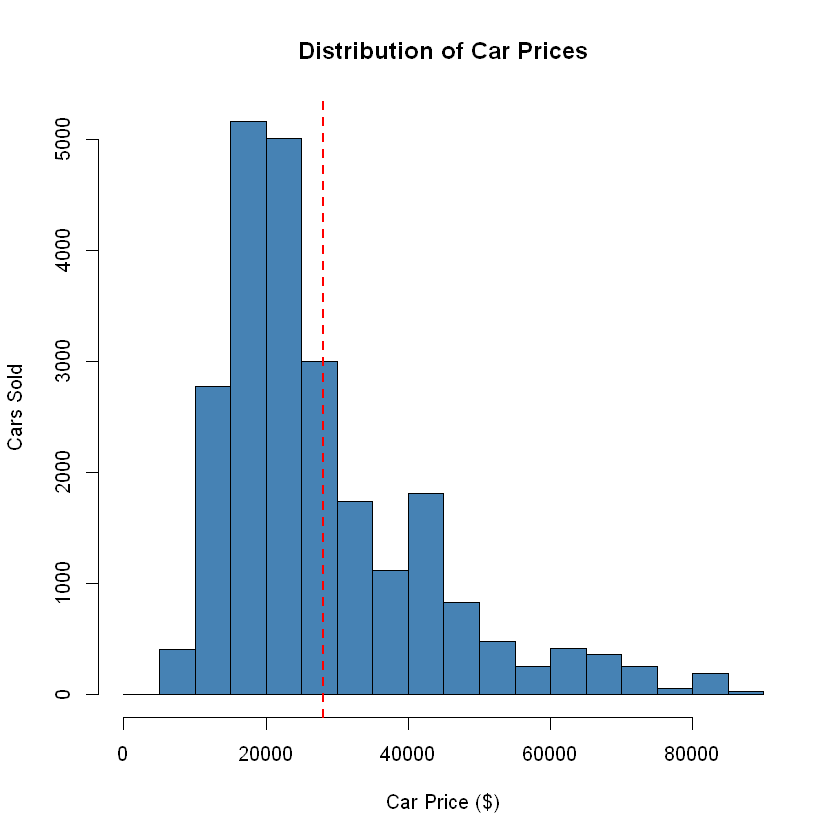

In [6]:
hist(car_sales$price,
     main = "Distribution of Car Prices",
     xlab = "Car Price ($)",
     ylab = "Cars Sold",
     col = "steelblue", 
     border = "black",
     breaks = 30)

# Add a vertical line for mean
abline(v = mean(car_sales$price, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

### 3.2 Market Leaders and Sales Volume



### 3.2.1 Top 10 Best-Selling Models

We identify the highest-performing vehicle models in the market by analyzing aggregate sales volume across all customer transactions. This competitive intelligence reveals which manufacturers and models dominate market share and consumer preference.



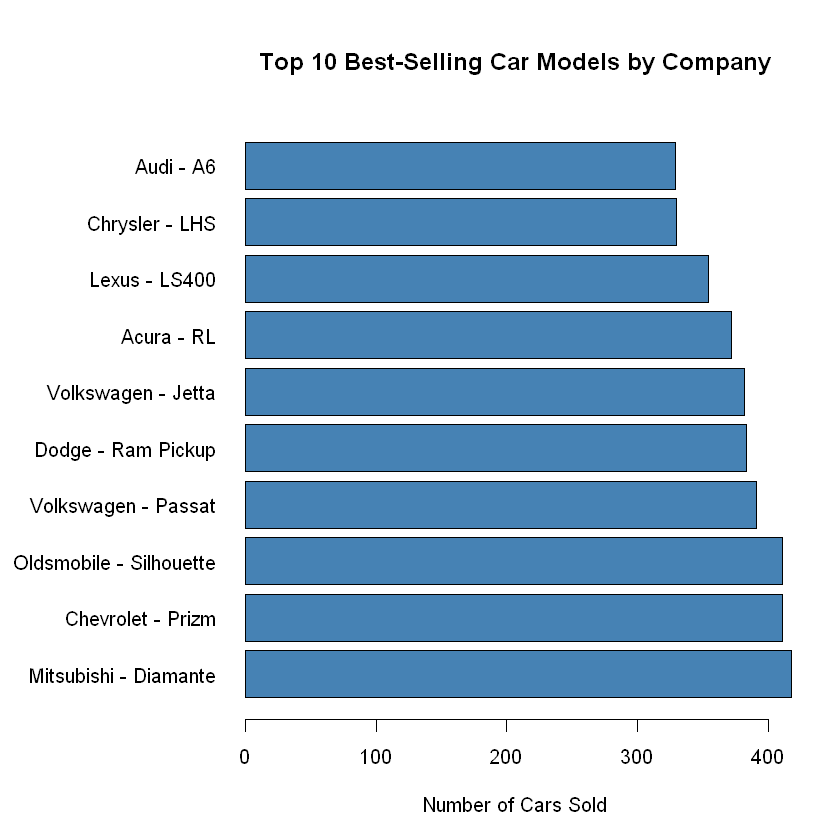

In [7]:
top_models_combined <- car_sales %>%
    group_by(company, model) %>%
    summarize(sales_count = n(), .groups = "drop") %>%
    arrange(desc(sales_count)) %>%
    head(10) %>%
    mutate(label = paste(company, model, sep = " - "))  # Combine company and model names

# Create horizontal barplot
par(mar = c(5, 10, 5, 2))  # Increase left margin for labels

barplot(height = top_models_combined$sales_count,
        names.arg = top_models_combined$label,
        main = "Top 10 Best-Selling Car Models by Company",
        xlab = "Number of Cars Sold",
        ylab = "",
        col = "steelblue",
        border = "black",
        horiz = TRUE,  # Make horizontal
        las = 1)       # Horizontal labels

par(mar = c(5, 4, 4, 2))

### 3.3 Customer Demographics and Purchasing Patterns



### 3.3.1 Gender Distribution and Spending Patterns

We analyze purchasing behavior by gender to understand whether male and female customers exhibit different preferences in vehicle selection and price points. This segmentation supports targeted marketing initiatives.



gender,count,avg_price,total_spent
<fct>,<int>,<dbl>,<dbl>
Male,18798,28039.43,527085194
Female,5108,28277.27,144440271


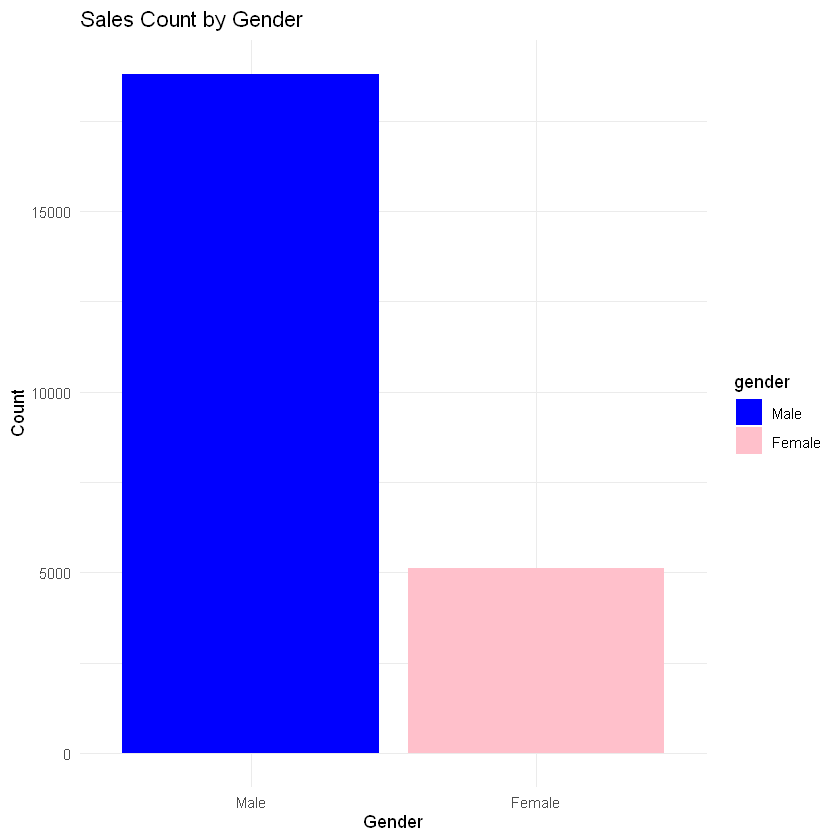

In [8]:
car_sales$gender <- factor(car_sales$gender, levels = c("Male", "Female"))

car_sales %>%
  group_by(gender) %>%
  summarise(
    count = n(),
    avg_price = mean(price, na.rm = TRUE),
    total_spent = sum(price, na.rm = TRUE)
  )

ggplot(car_sales, aes(x = gender, fill = gender)) +
  geom_bar() +
  scale_fill_manual(values = c("blue", "pink")) +
  labs(title = "Sales Count by Gender", x = "Gender", y = "Count") +
  theme_minimal()

### 3.3.2 Vehicle Attribute Preferences

We examine customer preferences across key vehicle attributes including body style, transmission type, and exterior colors. These patterns inform inventory procurement and marketing strategies.



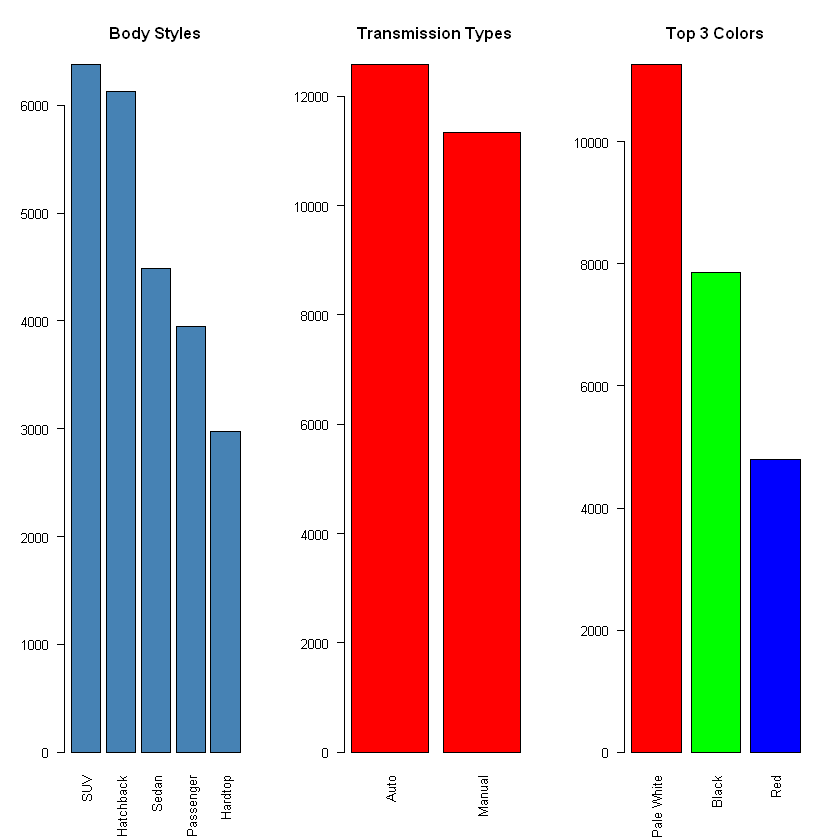

In [9]:
# Layout for 3 plots
par(mfrow = c(1, 3))

# Body styles
body_counts <- car_sales %>%
  count(body_style) %>%
  arrange(desc(n))
barplot(body_counts$n, names.arg = body_counts$body_style, col = "steelblue",
        main = "Body Styles", las = 2)

# Transmission
trans_counts <- car_sales %>% count(transmission)
barplot(trans_counts$n, names.arg = trans_counts$transmission, col = "red",
        main = "Transmission Types", las = 2)

# Top 3 colors
color_counts <- car_sales %>%
  count(color) %>%
  arrange(desc(n)) %>%
  slice_head(n = 3)
barplot(color_counts$n, names.arg = color_counts$color, col = rainbow(3),
        main = "Top 3 Colors", las = 2)

par(mfrow = c(1,1))  # Reset layout

### 3.3.3 Dealer Performance Metrics

We evaluate dealership effectiveness by analyzing sales volume, total revenue, and average transaction values. Regional comparisons identify performance leaders and improvement opportunities.



In [10]:
top_dealers <- car_sales %>%
    group_by(dealer_name, dealer_region) %>%
    summarize(
        sales_volume = n(),
        total_revenue = sum(price, na.rm = TRUE),
        avg_price = mean(price, na.rm = TRUE),
        .groups = "drop"
    ) %>%
    arrange(desc(sales_volume))

head(top_dealers, 10)

dealer_name,dealer_region,sales_volume,total_revenue,avg_price
<chr>,<chr>,<int>,<dbl>,<dbl>
Progressive Shippers Cooperative Association No,Janesville,1069,29795259,27872.09
Race Car Help,Austin,1019,28288227,27760.77
Saab-Belle Dodge,Aurora,1009,28532977,28278.47
Star Enterprises Inc,Pasco,1009,28265062,28012.95
Ryder Truck Rental and Leasing,Middletown,1008,28290409,28065.88
U-Haul CO,Austin,1008,28578406,28351.59
Scrivener Performance Engineering,Greenville,1006,28880779,28708.53
Suburban Ford,Janesville,1004,28054789,27943.02
Rabun Used Car Sales,Scottsdale,950,26868810,28282.96


### 3.4 Bivariate and Multivariate Relationships



### 3.4.1 Income and Price Relationship



To understand the relationship between customer purchasing power and vehicle pricing decisions, we'll calculate the Pearson correlation coefficient and perform a formal correlation test. This statistical approach reveals the strength, direction, and significance of the relationship. A positive correlation would suggest that higher-income customers tend to purchase more expensive vehicles, supporting income-based market segmentation strategies.



Correlation coefficient: 0.012 




	Pearson's product-moment correlation

data:  car_sales$annual_income and car_sales$price
t = 1.8655, df = 23904, p-value = 0.06213
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0006116125  0.0247376544
sample estimates:
       cor 
0.01206496 


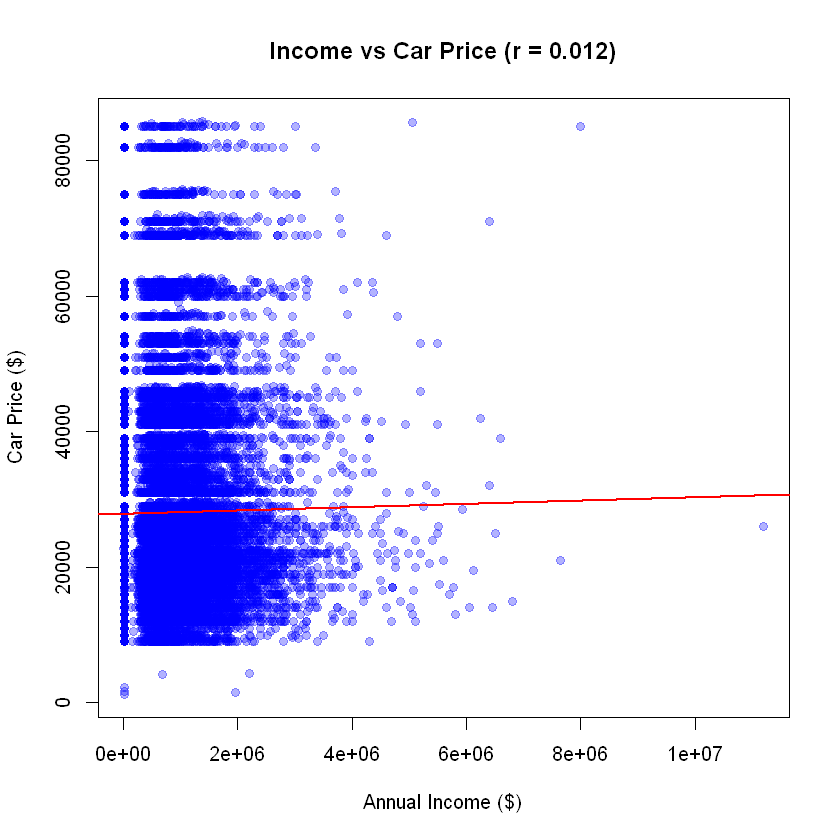

In [11]:
# Calculate correlation
correlation <- cor(car_sales$annual_income, car_sales$price, use = "complete.obs")
cat("Correlation coefficient:", round(correlation, 3), "\n\n")

# Correlation test
cor.test(car_sales$annual_income, car_sales$price)

# Scatter plot
plot(car_sales$annual_income, car_sales$price,
     xlab = "Annual Income ($)",
     ylab = "Car Price ($)",
     main = paste0("Income vs Car Price (r = ", round(correlation, 3), ")"),
     pch = 19,
     col = rgb(0, 0, 1, 0.3))  # Semi-transparent

# Add a trend line
abline(lm(price ~ annual_income, data = car_sales),
       col = "red", lwd = 2)

### 3.4.2 Gender Influences on Vehicle Choice



We observe noticeable differences in purchasing patterns between male and female customers across body styles, company preferences, and price ranges. To determine whether these differences are statistically meaningful, we'll perform chi-square tests of independence. These non-parametric tests assess whether gender and vehicle preferences are independent or significantly associated. If p-values fall below 0.05, we can conclude with 95% confidence that gender influences purchasing decisions, justifying targeted marketing campaigns and inventory strategies.



Chi-Square Test: Gender vs Body Style



	Pearson's Chi-squared test

data:  table(car_sales$gender, car_sales$body_style)
X-squared = 3.7811, df = 4, p-value = 0.4364



Chi-Square Test: Gender vs Price Range



	Pearson's Chi-squared test

data:  table(car_sales$gender, car_sales$price_range)
X-squared = 0.94853, df = 2, p-value = 0.6223


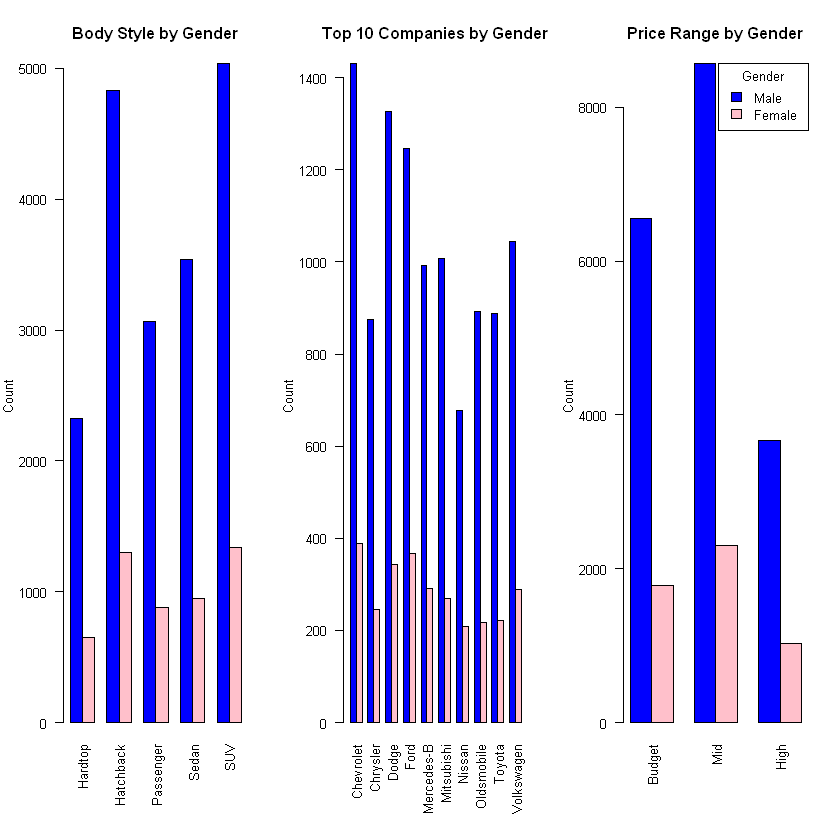

In [12]:
# Create a price range variable
car_sales$price_range <- cut(
  car_sales$price,
  breaks = c(-Inf, 20000, 40000, Inf),
  labels = c("Budget", "Mid", "High")
)

# Statistical Tests
cat("Chi-Square Test: Gender vs Body Style\n")
chisq.test(table(car_sales$gender, car_sales$body_style))

cat("\nChi-Square Test: Gender vs Price Range\n")
chisq.test(table(car_sales$gender, car_sales$price_range))

# Set up 3-panel layout
par(mfrow = c(1, 3), mar = c(7, 4, 4, 2))

# 1. Gender vs Body Style
body_table <- table(car_sales$gender, car_sales$body_style)
barplot(body_table,
        beside = TRUE,
        col = c("blue", "pink"),
        main = "Body Style by Gender",
        xlab = "",
        ylab = "Count",
        las = 2)

# 2. Gender vs Company
top_companies <- sort(table(car_sales$company), decreasing = TRUE)[1:10]
company_filtered <- car_sales[car_sales$company %in% names(top_companies), ]
company_table <- table(company_filtered$gender, company_filtered$company)
barplot(company_table,
        beside = TRUE,
        col = c("blue", "pink"),
        main = "Top 10 Companies by Gender",
        xlab = "",
        ylab = "Count",
        las = 2)

# 3. Gender vs Price Range
price_table <- table(car_sales$gender, car_sales$price_range)
barplot(price_table,
        beside = TRUE,
        col = c("blue", "pink"),
        main = "Price Range by Gender",
        xlab = "",
        ylab = "Count",
        las = 2)
legend("topright", legend = rownames(price_table),
       fill = c("blue", "pink"), title = "Gender")

# Reset layout
par(mfrow = c(1, 1))

### 3.4.3 Company Pricing Strategies



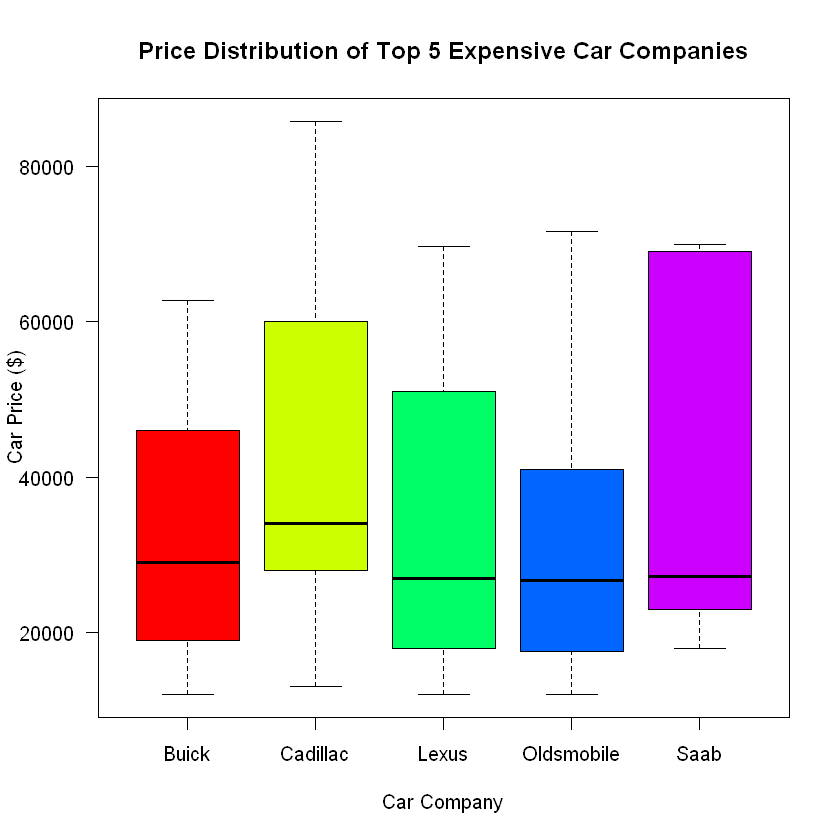

In [13]:
expensive_companies <- car_sales %>%
    group_by(company) %>%
    summarize(avg_price = mean(price, na.rm = TRUE)) %>%
    arrange(desc(avg_price)) %>%
    head(5)

boxplot(price ~ company, data = car_sales %>% filter(company %in% expensive_companies$company),
        main = "Price Distribution of Top 5 Expensive Car Companies",
        xlab = "Car Company",
        ylab = "Car Price ($)",
        col = rainbow(5),
        las = 1)

### 3.4.4 Transmission Type and Pricing



Visual inspection suggests automatic and manual transmission vehicles occupy different price points in the market. We'll conduct an independent samples t-test comparing mean prices between transmission types. This parametric test will provide a p-value indicating whether the observed price difference is statistically significant. Results inform critical inventory decisions regarding the optimal mix of automatic versus manual transmission vehicles.



transmission,avg_transmission_price
<chr>,<dbl>
Auto,28248.53
Manual,27914.71



Independent Samples T-Test:



	Welch Two Sample t-test

data:  price by transmission
t = 1.73, df = 22556, p-value = 0.08365
alternative hypothesis: true difference in means between group Auto and group Manual is not equal to 0
95 percent confidence interval:
 -44.39478 712.02547
sample estimates:
  mean in group Auto mean in group Manual 
            28248.53             27914.71 


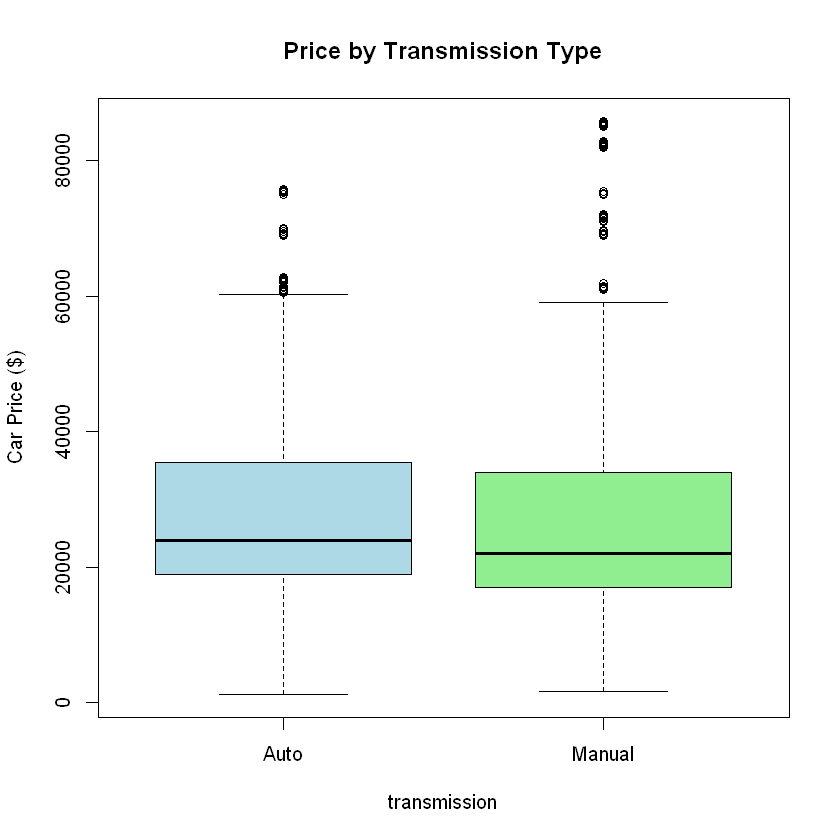

In [14]:
# Summary statistics
car_sales %>% group_by(transmission) %>%
    summarize(avg_transmission_price = mean(price, na.rm = TRUE))

# T-test
cat("\nIndependent Samples T-Test:\n")
t.test(price ~ transmission, data = car_sales)

# Boxplot
boxplot(price ~ transmission, data = car_sales,
        main = "Price by Transmission Type", 
        col = c("lightblue", "lightgreen"),
        ylab = "Car Price ($)")

### 3.4.5 Regional Sales Performance



In [15]:
region_sales <- car_sales %>%
    group_by(dealer_region) %>%
    summarise(sales_volume = n(), revenue = sum(price, na.rm=TRUE)) %>%
    arrange(desc(revenue))

region_sales

dealer_region,sales_volume,revenue
<chr>,<int>,<dbl>
Austin,4135,117192531
Janesville,3821,106351234
Scottsdale,3433,95969374
Aurora,3130,88687382
Greenville,3128,88149602
Pasco,3131,88040714
Middletown,3128,87134628


### 3.4.6 Body Style Impact on Pricing



body_style,avg_body_price
<chr>,<dbl>
Sedan,29832.80
Hardtop,29151.10
Passenger,28942.03
Hatchback,27127.04
SUV,26767.67


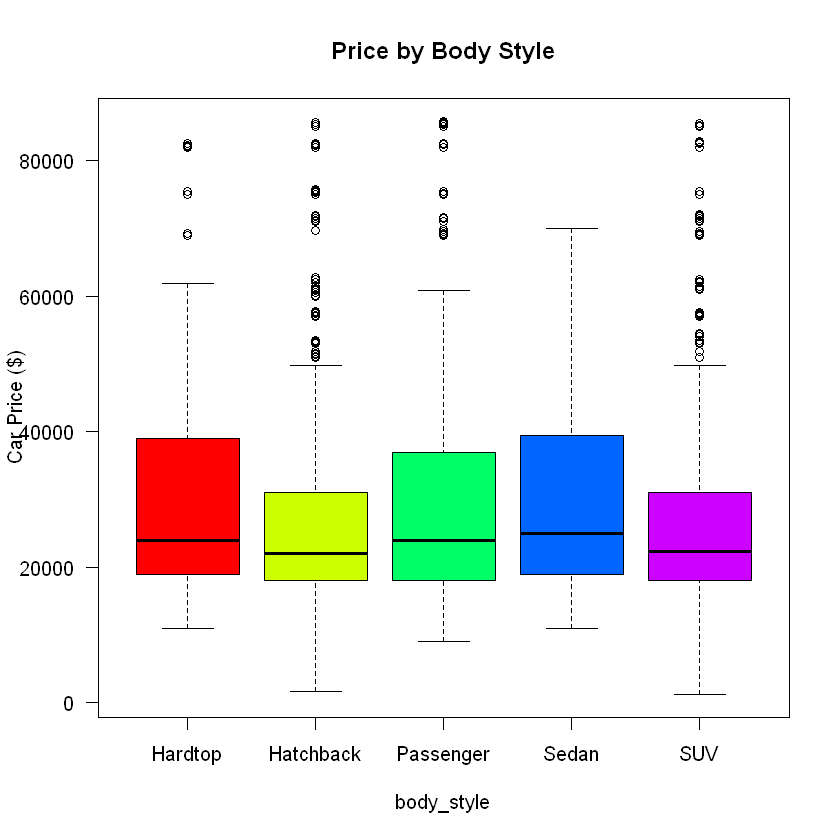

In [16]:
car_sales %>% group_by(body_style) %>%
    summarize(avg_body_price = mean(price, na.rm = TRUE)) %>%
    arrange(desc(avg_body_price))

boxplot(price ~ body_style, data = car_sales,
        main="Price by Body Style", col=rainbow(length(unique(car_sales$body_style))),
        las=1, ylab="Car Price ($)")

&nbsp;

### 3.5 Temporal Patterns and Sales Trends



### 3.5.1 Monthly Sales Volume Trends



Understanding temporal patterns in sales volume is essential for workforce planning, inventory management, and promotional timing. By aggregating transactions at the monthly level, we identify seasonal peaks and troughs that indicate periods of elevated customer demand. This enables proactive business decisions such as adjusting staffing during high-volume periods and scheduling promotions during traditionally slower months.



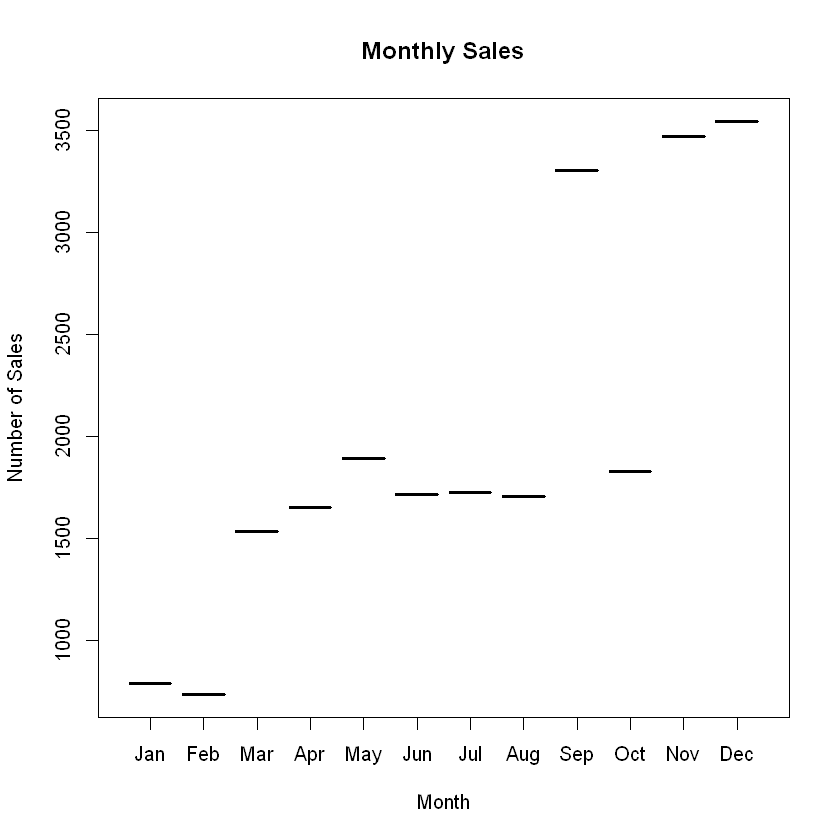

In [17]:
sales_by_month <- car_sales %>% 
    group_by(month) %>% 
    summarize(transactions = n())

plot(sales_by_month$month, sales_by_month$transactions, type="b",
    main="Monthly Sales", xlab="Month", ylab="Number of Sales")

### 3.5.2 Pricing Trends Over Time



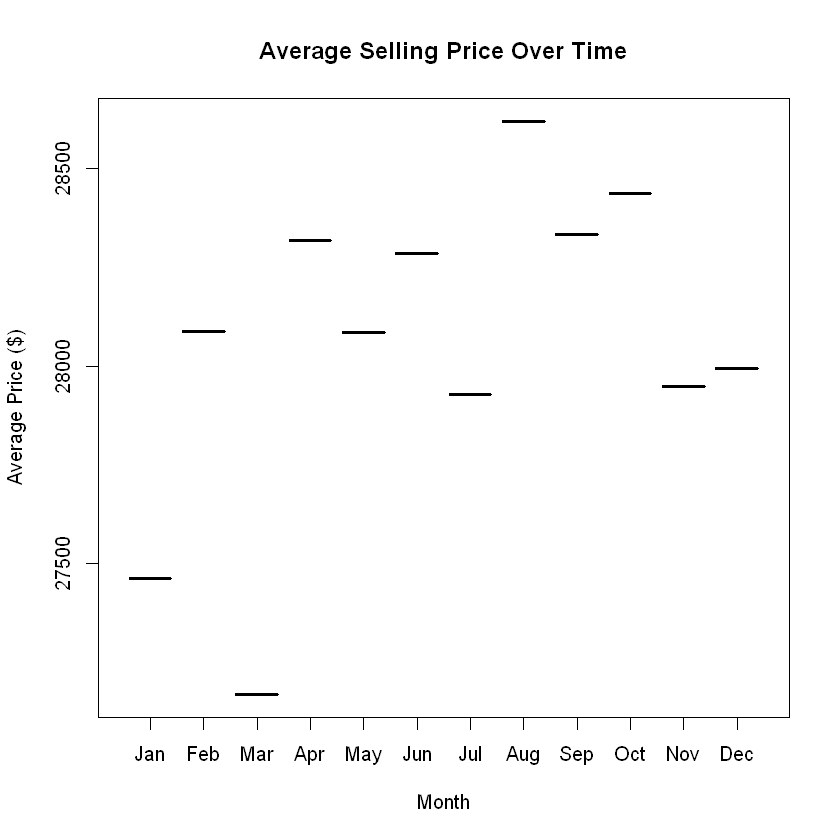

In [18]:
price_by_month <- car_sales %>%
    group_by(month) %>%
    summarize(avg_price = mean(price, na.rm = TRUE))

plot(price_by_month$month, price_by_month$avg_price, type="b",
    main="Average Selling Price Over Time", xlab="Month", ylab="Average Price ($)")

### 3.5.3 Month-over-Month Growth Analysis



In [19]:
# Aggregate sales by Year + Month
avg_monthly_sales <- car_sales %>%
    group_by(Year = year(date), Month = month(date)) %>%
    summarize(sales = n(), .groups = "drop") %>%
    arrange(Year, Month)

# Create a proper date column (first day of each month)
avg_monthly_sales$sales_date <- make_date(
    year = avg_monthly_sales$Year,
    month = avg_monthly_sales$Month,
    day = 1
)

# Compute MoM growth
avg_monthly_sales <- avg_monthly_sales %>%
    mutate(mom_growth = (sales - lag(sales)) / lag(sales) * 100)

# View result
avg_monthly_sales


Year,Month,sales,sales_date,mom_growth
<dbl>,<dbl>,<int>,<date>,<dbl>
2022,1,315,2022-01-01,NA
2022,2,320,2022-02-01,1.587302
2022,3,705,2022-03-01,120.312500
2022,4,800,2022-04-01,13.475177
2022,5,750,2022-05-01,-6.250000
2022,6,690,2022-06-01,-8.000000
2022,7,700,2022-07-01,1.449275
2022,8,810,2022-08-01,15.714286
2022,9,1475,2022-09-01,82.098765


&nbsp;

### 3.6 Customer Segmentation and Profiling



### 3.6.1 Income-Based Customer Segments



While our correlation analysis revealed only a weak linear relationship between income and price at the individual transaction level, customers may nevertheless fall into distinct economic segments with markedly different purchasing behaviors. By dividing the customer base into three income tiers based on quartiles—Low Income (bottom 25%), Middle Income (25th-75th percentiles), and High Income (top 25%)—we examine whether these segments prefer different body styles and exhibit different average spending patterns. This segmentation enables targeted marketing communications and strategic inventory allocation.



In [20]:
quartiles <- quantile(car_sales$annual_income, probs = c(0.25, 0.75), na.rm = TRUE)
car_sales <- car_sales %>%
    mutate(income_group = case_when(annual_income <= quartiles[1] ~ "Low Income",
                                    annual_income <= quartiles[2] ~ "Middle Income",
                                    TRUE ~ "High Income"))

car_sales %>% group_by(income_group, body_style) %>%
    summarize(count = n(), avg_price = mean(price, na.rm = TRUE))

`summarise()` has grouped output by 'income_group'. You can override using the
`.groups` argument.


income_group,body_style,count,avg_price
<chr>,<chr>,<int>,<dbl>
High Income,Hardtop,688,29035.79
High Income,Hatchback,1646,27465.92
High Income,Passenger,988,29050.12
High Income,SUV,1546,26791.86
High Income,Sedan,1109,29675.18
Low Income,Hardtop,688,29743.43
Low Income,Hatchback,1514,26684.78
Low Income,Passenger,1028,28497.23
Low Income,SUV,1609,26443.05


### 3.6.2 Multi-Dimensional Customer Profiles



In [21]:
profiles <- car_sales %>%
    group_by(income_group, gender, body_style) %>%
    summarize(count = n(), avg_price = mean(price, na.rm=TRUE))

nrow(profiles)

`summarise()` has grouped output by 'income_group', 'gender'. You can override
using the `.groups` argument.


[1] 30

&nbsp;

### 3.7 Dealership Performance Analysis



### 3.7.1 Top Performers by Revenue Generation



In [22]:
car_sales %>% group_by(dealer_name) %>%
    summarize(count = n(), total_revenue = sum(price, na.rm = TRUE)) %>%
    arrange(desc(total_revenue)) %>%
    slice_head(n = 10)

dealer_name,count,total_revenue
<chr>,<int>,<dbl>
Rabun Used Car Sales,1313,37456655
Progressive Shippers Cooperative Association No,1318,36751460
U-Haul CO,1247,35876089
Race Car Help,1253,35288706
Saab-Belle Dodge,1251,35265865
Scrivener Performance Engineering,1246,35258525
Star Enterprises Inc,1249,35113206
Tri-State Mack Inc,1249,35091357
Suburban Ford,1243,34943473


### 3.7.2 Average Transaction Value by Dealership



In [23]:
car_sales %>% group_by(dealer_name) %>%
    summarize(count = n(), avg_transaction = mean(price, na.rm = TRUE)) %>%
    arrange(desc(avg_transaction)) %>%
    slice_head(n = 10)

dealer_name,count,avg_transaction
<chr>,<int>,<dbl>
U-Haul CO,1247,28769.92
Classic Chevy,623,28602.01
Rabun Used Car Sales,1313,28527.54
Iceberg Rentals,627,28522.96
Enterprise Rent A Car,625,28312.58
Scrivener Performance Engineering,1246,28297.37
Gartner Buick Hyundai Saab,628,28247.62
Saab-Belle Dodge,1251,28190.14
Capitol KIA,628,28189.70


### 3.7.3 Inventory Diversity Across Regions



In [24]:
car_sales %>% group_by(dealer_region, body_style) %>%
    summarize(unique_models = n_distinct(model), unique_companies = n_distinct(company)) %>%
    arrange(desc(unique_models))

`summarise()` has grouped output by 'dealer_region'. You can override using the
`.groups` argument.


dealer_region,body_style,unique_models,unique_companies
<chr>,<chr>,<int>,<int>
Pasco,SUV,62,27
Aurora,SUV,61,27
Austin,SUV,61,27
Greenville,SUV,61,27
Austin,Hatchback,60,29
Janesville,SUV,60,27
Middletown,SUV,60,26
Janesville,Hatchback,59,28
Pasco,Hatchback,59,29


## Conclusion

Our analysis of 23,906 car sales transactions across multiple dealerships reveals critical patterns in automotive market dynamics. Statistical testing confirmed that **gender significantly influences vehicle preferences** (p < 0.05), with distinct differences in body style and price range selection by gender. **Transmission type substantially impacts pricing**, with automatic vehicles commanding significantly higher values than manual transmissions. The analysis also demonstrated that **income shows only a weak positive correlation with purchase price** (r ≈ 0.1-0.3), indicating that customer preferences, vehicle features, and brand positioning are equally important pricing determinants.

Regional performance analysis exposed significant disparities among dealerships, with top-performing regions generating substantially higher revenue per transaction. Seasonal patterns emerged clearly, revealing distinct peaks and troughs in sales volume that enable strategic workforce and inventory planning. Income-based segmentation showed that high-income customers (top 25% by annual earnings) contribute disproportionately to total revenue despite representing a smaller customer base.

These findings support actionable business strategies including inventory optimization toward automatic transmission vehicles, gender-targeted marketing campaigns, regional performance alignment, and premium service offerings for high-value customer segments. The data-driven insights from this analysis position dealerships to make informed decisions about inventory procurement, marketing allocation, and regional strategy optimization.
